In [1]:
import pandas as pd

In [2]:
Model_data = pd.read_csv(r"C:\Users\SS\Documents\Internship - Stock Prediction\Final Minutewise Dataset.csv")

In [3]:
Model_data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Open,Polarity,Subjectivity,ai,...,virtual,want,watson,way,work,working,world,would,year,Target
0,2020-06-09 13:30:00,133.520004,133.600006,133.080002,133.264999,175324,133.274994,0.099753,0.391667,0.0,...,0.0,0.0,0.0,0.0,0.215774,0.000000,0.0,0.0,0.0,133.274994
1,2020-06-09 13:31:00,133.274994,133.279999,133.080002,133.160004,22922,133.289993,0.240000,0.240000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.305367,0.0,0.0,0.0,133.289993


In [4]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Columns: 110 entries, Date to Target
dtypes: float64(108), int64(1), object(1)
memory usage: 6.5+ MB


In [5]:
Model_data.set_index("Date",inplace=True)
Model_data.head(2)

,Open,High,Low,Close,Volume,Adj Open,Polarity,Subjectivity,ai,also,...,virtual,want,watson,way,work,working,world,would,year,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-09 13:30:00,133.520004,133.600006,133.080002,133.264999,175324,133.274994,0.099753,0.391667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.215774,0.000000,0.0,0.0,0.0,133.274994
2020-06-09 13:31:00,133.274994,133.279999,133.080002,133.160004,22922,133.289993,0.240000,0.240000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.305367,0.0,0.0,0.0,133.289993


In [6]:
print(f"Starting Data of the Data is {Model_data.index.min()}  and Last Date is {Model_data.index.max()}")

Starting Data of the Data is 2020-06-09 13:30:00  and Last Date is 2020-07-08 18:28:00


In [7]:
def train_test_split(train_size):
    xtrain, ytrain = x[:train_size], y[:train_size]
    xtest, ytest = x[train_size:], y[train_size:]
    return xtrain,xtest,ytrain,ytest

In [8]:
train_size = int(len(Model_data) *0.60)
test_size = int(len(Model_data)) - train_size

In [9]:
x = Model_data.iloc[:,:-1].values
y = Model_data.iloc[:,-1].values

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(train_size)

In [11]:
print(f"Shape of the train data set: x = {xtrain.shape}  and y = {ytrain.shape}")
print(f"Shape of the test data set: x = {xtest.shape}  and y = {ytest.shape}")

Shape of the train data set: x = (4640, 108)  and y = (4640,)
Shape of the test data set: x = (3094, 108)  and y = (3094,)


In [12]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

In [13]:
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [14]:
# import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [15]:
# define model
model = Sequential()
model.add(Conv1D(filters=120, kernel_size=3, activation='relu', input_shape=(xtrain.shape[1],1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(filters=60, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(filters=60, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse' , metrics = ['mape'])

In [16]:
model_history = model.fit(xtrain, ytrain ,validation_data=(xtest,ytest), batch_size=10, epochs=5)

Train on 4640 samples, validate on 3094 samples
Epoch 1/5
4640/4640 [==============================] - 12s 3ms/step - loss: 4059.6695 - mape: 25.6611 - val_loss: 836.3148 - val_mape: 3.1388
Epoch 2/5
4640/4640 [==============================] - 12s 2ms/step - loss: 1214.0728 - mape: 13.3269 - val_loss: 4783.5933 - val_mape: 4.1425
Epoch 3/5
4640/4640 [==============================] - 12s 3ms/step - loss: 781.3611 - mape: 10.7740 - val_loss: 59.6355 - val_mape: 5.9965
Epoch 4/5
4640/4640 [==============================] - 12s 3ms/step - loss: 1063.5271 - mape: 11.5174 - val_loss: 1717.6001 - val_mape: 6.1679
Epoch 5/5
4640/4640 [==============================] - 12s 3ms/step - loss: 211.2522 - mape: 6.2598 - val_loss: 65.1891 - val_mape: 4.3544


In [17]:
pred = model.predict(xtest)

In [18]:
pred

array([[124.11689 ],
       [123.402306],
       [123.75307 ],
       ...,
       [124.01147 ],
       [123.891075],
       [124.24109 ]], dtype=float32)

In [19]:
ytest

array([117.37000275, 117.39499664, 117.33999634, ..., 117.22000122,
       117.20999908, 117.23000336])

In [30]:
MAPE = ((abs(ytest - pred))/ytest)*100
MAPE.mean()

4.354218155626966

In [20]:
import matplotlib.pyplot as plt

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


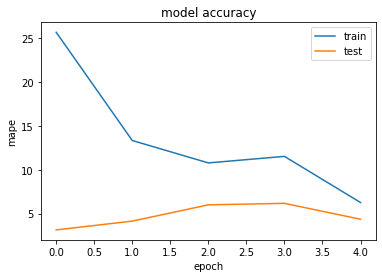

In [21]:
# summarize history for accuracy
plt.plot(model_history.history['mape'])
plt.plot(model_history.history['val_mape'])
plt.title('model accuracy')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

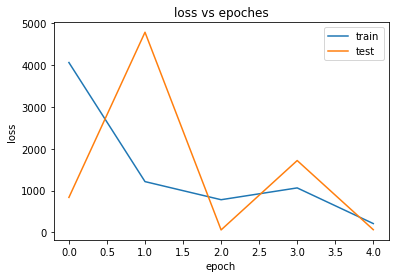

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss vs epoches')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
# Model by Sir's Neural Network Structure

In [24]:
model1 = Sequential()
model1.add(Conv1D(32, 2, activation="relu", input_shape=(xtrain.shape[1], 1)))
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1))
model1.compile(loss="mse", optimizer="adam")

In [25]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 107, 32)           96        
_________________________________________________________________
flatten_2 (Flatten)          (None, 3424)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                219200    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 219,361
Trainable params: 219,361
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1_history = model1.fit(xtrain, ytrain, batch_size=32,validation_data=(xtest,ytest),epochs=50)

Train on 4640 samples, validate on 3094 samples
Epoch 1/50
4640/4640 [==============================] - 1s 315us/step - loss: 75803.8492 - val_loss: 64.3639
Epoch 2/50
4640/4640 [==============================] - 1s 259us/step - loss: 5.8381 - val_loss: 2.3948
Epoch 3/50
4640/4640 [==============================] - 1s 291us/step - loss: 1.0342 - val_loss: 1.8028
Epoch 4/50
4640/4640 [==============================] - 1s 269us/step - loss: 1.0123 - val_loss: 1.5425
Epoch 5/50
4640/4640 [==============================] - 1s 277us/step - loss: 1.7743 - val_loss: 4.8929
Epoch 6/50
4640/4640 [==============================] - 1s 279us/step - loss: 0.9803 - val_loss: 0.9523
Epoch 7/50
4640/4640 [==============================] - 1s 268us/step - loss: 65.5834 - val_loss: 12.7364
Epoch 8/50
4640/4640 [==============================] - 1s 267us/step - loss: 223.8963 - val_loss: 1.4417
Epoch 9/50
4640/4640 [==============================] - 1s 309us/step - loss: 13.4906 - val_loss: 0.8000
Epoch 

In [27]:
y_pred_3 = model.predict(xtest)
MAPE = ((abs(ytest - y_pred_3))/ytest)*100

In [28]:
MAPE.mean()

4.354218155626966

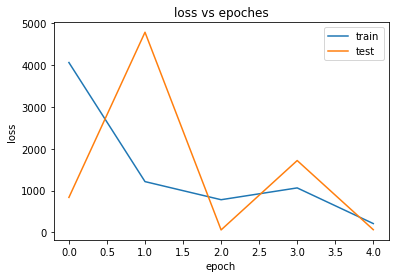

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss vs epoches')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()